**IMPORTING ALL ESSENTIAL LIBRARIES**

In [ ]:
# Install Prophet in Google Colab
!pip install prophet


In [ ]:
import pandas as pd
import plotly.express as px
from prophet import Prophet
import plotly.io as pio
pio.renderers.default = 'colab'

**Downloading & Uploading Data Directly From Yahoo Finance**

In [ ]:
import yfinance as yf

# Define the ticker symbol
ticker = 'TSLA'

# Get data for the specified ticker
tesla_data = yf.download(ticker, start='2023-11-13', end='2024-11-13')

# Save the data to a CSV file
tesla_data.to_csv('tesla_stock_data.csv')

[*********************100%***********************]  1 of 1 completed


**DATASET DISPLAY AND OVERVIEW**

In [ ]:
df=pd.read_csv('tesla_stock_data.csv')

In [ ]:
df

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-11-13 00:00:00+00:00,223.7100067138672,223.7100067138672,225.39999389648438,211.61000061035156,215.60000610351562,140447600
3,2023-11-14 00:00:00+00:00,237.41000366210938,237.41000366210938,238.13999938964844,230.72000122070312,235.02999877929688,149771600
4,2023-11-15 00:00:00+00:00,242.83999633789062,242.83999633789062,246.6999969482422,236.4499969482422,239.2899932861328,150354000
...,...,...,...,...,...,...,...
249,2024-11-06 00:00:00+00:00,288.5299987792969,288.5299987792969,289.5899963378906,275.6199951171875,284.6700134277344,165228700
250,2024-11-07 00:00:00+00:00,296.9100036621094,296.9100036621094,299.75,285.5199890136719,288.8900146484375,117309200
251,2024-11-08 00:00:00+00:00,321.2200012207031,321.2200012207031,328.7099914550781,297.6600036621094,299.1400146484375,204782800
252,2024-11-11 00:00:00+00:00,350.0,350.0,358.6400146484375,336.0,346.29998779296875,210521600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      254 non-null    object
 1   Adj Close  253 non-null    object
 2   Close      253 non-null    object
 3   High       253 non-null    object
 4   Low        253 non-null    object
 5   Open       253 non-null    object
 6   Volume     253 non-null    object
dtypes: object(7)
memory usage: 14.0+ KB


In [ ]:
df.describe()

,Price,Adj Close,Close,High,Low,Open,Volume
count,254,253,253,253,253,253,253
unique,254,251,251,251,250,250,253
top,2024-11-12 00:00:00+00:00,242.83999633789062,242.83999633789062,200.8800048828125,182.0,178.5800018310547,153593000
freq,1,2,2,2,2,2,1


In [ ]:
px.area (df,x='Price',y='Close')

In [ ]:
px.line (df,x='Price',y='Close')

In [ ]:
px.area (df,x='Price',y='Volume')

In [ ]:
px.bar(df, y='Volume')

In [ ]:
px.box(df, y='Close')

In [ ]:
columns=['Price','Close']
ndf=pd.DataFrame(df,columns=columns)

In [ ]:
ndf

,Price,Close
0,Ticker,TSLA
1,Date,NaN
2,2023-11-13 00:00:00+00:00,223.7100067138672
3,2023-11-14 00:00:00+00:00,237.41000366210938
4,2023-11-15 00:00:00+00:00,242.83999633789062
...,...,...
249,2024-11-06 00:00:00+00:00,288.5299987792969
250,2024-11-07 00:00:00+00:00,296.9100036621094
251,2024-11-08 00:00:00+00:00,321.2200012207031
252,2024-11-11 00:00:00+00:00,350.0


**DATASET CLEANING FOR PRE-TUNED FACEBOOK PROPHET MODELLING**

In [ ]:


# Drop the first two rows by using iloc to select rows starting from index 2
df_cleaned = ndf.iloc[2:, :]

# Select only the 'Date' and 'Close' columns
df_filtered = df_cleaned[['Price', 'Close']]

# Remove time zone information from the 'Date' column
df_filtered['Price'] = pd.to_datetime(df_filtered['Price']).dt.tz_localize(None)

# Reset the index to make the DataFrame more readable
df_filtered.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(df_filtered)



         Price               Close
0   2023-11-13   223.7100067138672
1   2023-11-14  237.41000366210938
2   2023-11-15  242.83999633789062
3   2023-11-16  233.58999633789062
4   2023-11-17   234.3000030517578
..         ...                 ...
247 2024-11-06   288.5299987792969
248 2024-11-07   296.9100036621094
249 2024-11-08   321.2200012207031
250 2024-11-11               350.0
251 2024-11-12    328.489990234375

[252 rows x 2 columns]


In [ ]:
prophet_df=df_filtered.rename(columns={'Price':'ds','Close':'y'})

In [ ]:
prophet_df

,ds,y
0,2023-11-13,223.7100067138672
1,2023-11-14,237.41000366210938
2,2023-11-15,242.83999633789062
3,2023-11-16,233.58999633789062
4,2023-11-17,234.3000030517578
...,...,...
247,2024-11-06,288.5299987792969
248,2024-11-07,296.9100036621094
249,2024-11-08,321.2200012207031
250,2024-11-11,350.0


**INITIALIZING FACEBOOK PROPHET MODEL FOR GIVEN DATASET**

In [ ]:
m=Prophet()
m.fit(prophet_df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeoaqgf3p/85rbj3cz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpeoaqgf3p/69c5is7e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64924', 'data', 'file=/tmp/tmpeoaqgf3p/85rbj3cz.json', 'init=/tmp/tmpeoaqgf3p/69c5is7e.json', 'output', 'file=/tmp/tmpeoaqgf3p/prophet_modelimbv1umz/prophet_model-20241113152624.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:26:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:26:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future=m.make_future_dataframe(periods=30)
forecast=m.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-11-13,247.323650,227.996147,277.129038,247.323650,247.323650,4.646786,4.646786,4.646786,4.646786,4.646786,4.646786,0.0,0.0,0.0,251.970436
1,2023-11-14,246.762010,227.171237,278.386747,246.762010,246.762010,5.987609,5.987609,5.987609,5.987609,5.987609,5.987609,0.0,0.0,0.0,252.749619
2,2023-11-15,246.200371,226.860526,275.879286,246.200371,246.200371,4.785967,4.785967,4.785967,4.785967,4.785967,4.785967,0.0,0.0,0.0,250.986337
3,2023-11-16,245.638731,225.209043,275.042201,245.638731,245.638731,4.256602,4.256602,4.256602,4.256602,4.256602,4.256602,0.0,0.0,0.0,249.895333
4,2023-11-17,245.077091,226.844247,274.499352,245.077091,245.077091,4.524037,4.524037,4.524037,4.524037,4.524037,4.524037,0.0,0.0,0.0,249.601128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,2024-12-08,270.601752,233.693735,283.312581,269.237333,272.029423,-12.100500,-12.100500,-12.100500,-12.100500,-12.100500,-12.100500,0.0,0.0,0.0,258.501251
278,2024-12-09,271.066479,251.639865,299.474431,269.613325,272.573545,4.646786,4.646786,4.646786,4.646786,4.646786,4.646786,0.0,0.0,0.0,275.713265
279,2024-12-10,271.531207,252.911267,301.221103,269.965793,273.148946,5.987609,5.987609,5.987609,5.987609,5.987609,5.987609,0.0,0.0,0.0,277.518816
280,2024-12-11,271.995935,251.594463,300.680203,270.328762,273.699531,4.785967,4.785967,4.785967,4.785967,4.785967,4.785967,0.0,0.0,0.0,276.781901


**FORECASTED PREDICTIONS DISPLAY BY FACEBOOK PROPHET**

In [ ]:
px.line(forecast, x='ds', y='yhat')

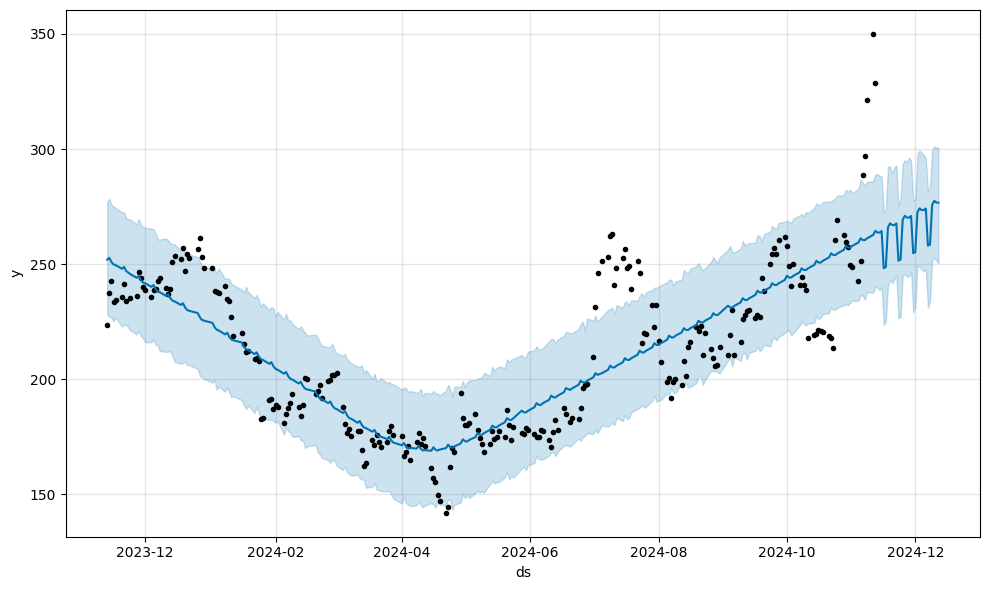

In [ ]:
figure=m.plot(forecast,xlabel='ds',ylabel='y')

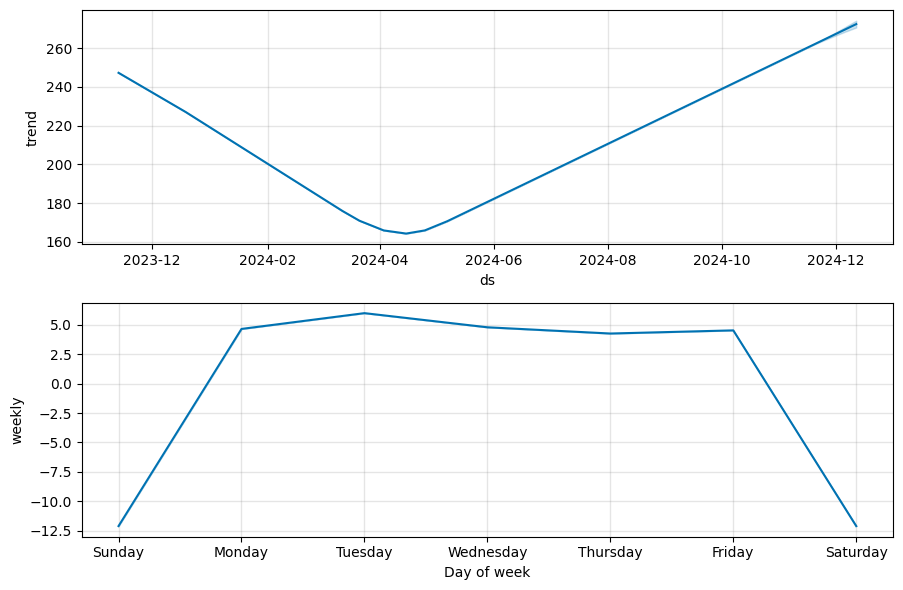

In [ ]:
figure2=m.plot_components(forecast)

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import Pandas for data manipulation
import pandas as pd

# Assuming the CSV file is named 'forecast.csv' (replace with your file name)
df_forecast = pd.read_csv('forecast.csv')

# Display the first few rows of the DataFrame
print(df_forecast.head())

# Alternatively, you can display it in a tabular format for a better view
df_forecast


   Unnamed: 0          ds       trend  yhat_lower  yhat_upper  trend_lower  \
0           0  2023-11-13  247.323650  227.996147  277.129038   247.323650   
1           1  2023-11-14  246.762010  227.171237  278.386747   246.762010   
2           2  2023-11-15  246.200371  226.860526  275.879286   246.200371   
3           3  2023-11-16  245.638731  225.209043  275.042201   245.638731   
4           4  2023-11-17  245.077091  226.844247  274.499352   245.077091   

   trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0   247.323650        4.646786              4.646786              4.646786   
1   246.762010        5.987609              5.987609              5.987609   
2   246.200371        4.785967              4.785967              4.785967   
3   245.638731        4.256602              4.256602              4.256602   
4   245.077091        4.524037              4.524037              4.524037   

     weekly  weekly_lower  weekly_upper  multiplicative_terms 

,Unnamed: 0,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,2023-11-13,247.323650,227.996147,277.129038,247.323650,247.323650,4.646786,4.646786,4.646786,4.646786,4.646786,4.646786,0.0,0.0,0.0,251.970436
1,1,2023-11-14,246.762010,227.171237,278.386747,246.762010,246.762010,5.987609,5.987609,5.987609,5.987609,5.987609,5.987609,0.0,0.0,0.0,252.749619
2,2,2023-11-15,246.200371,226.860526,275.879286,246.200371,246.200371,4.785967,4.785967,4.785967,4.785967,4.785967,4.785967,0.0,0.0,0.0,250.986337
3,3,2023-11-16,245.638731,225.209043,275.042201,245.638731,245.638731,4.256602,4.256602,4.256602,4.256602,4.256602,4.256602,0.0,0.0,0.0,249.895333
4,4,2023-11-17,245.077091,226.844247,274.499352,245.077091,245.077091,4.524037,4.524037,4.524037,4.524037,4.524037,4.524037,0.0,0.0,0.0,249.601128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,277,2024-12-08,270.601752,233.693735,283.312581,269.237333,272.029423,-12.100500,-12.100500,-12.100500,-12.100500,-12.100500,-12.100500,0.0,0.0,0.0,258.501251
278,278,2024-12-09,271.066479,251.639865,299.474431,269.613325,272.573545,4.646786,4.646786,4.646786,4.646786,4.646786,4.646786,0.0,0.0,0.0,275.713265
279,279,2024-12-10,271.531207,252.911267,301.221103,269.965793,273.148946,5.987609,5.987609,5.987609,5.987609,5.987609,5.987609,0.0,0.0,0.0,277.518816
280,280,2024-12-11,271.995935,251.594463,300.680203,270.328762,273.699531,4.785967,4.785967,4.785967,4.785967,4.785967,4.785967,0.0,0.0,0.0,276.781901


In [ ]:
# Filter to display only the 'ds' (date) and 'yhat' (predicted values) columns for the next 30 days
next_30_days_yhat = df_forecast[['ds', 'yhat']].tail(30)

# Display the filtered DataFrame
print(next_30_days_yhat)

# Alternatively, display it in tabular form
next_30_days_yhat


             ds        yhat
252  2024-11-13  263.769526
253  2024-11-14  263.704889
254  2024-11-15  264.437052
255  2024-11-16  248.277242
256  2024-11-17  248.741970
257  2024-11-18  265.953984
258  2024-11-19  267.759534
259  2024-11-20  267.022620
260  2024-11-21  266.957983
261  2024-11-22  267.690146
262  2024-11-23  251.530336
263  2024-11-24  251.995064
264  2024-11-25  269.207078
265  2024-11-26  271.012628
266  2024-11-27  270.275713
267  2024-11-28  270.211077
268  2024-11-29  270.943240
269  2024-11-30  254.783429
270  2024-12-01  255.248158
271  2024-12-02  272.460172
272  2024-12-03  274.265722
273  2024-12-04  273.528807
274  2024-12-05  273.464171
275  2024-12-06  274.196333
276  2024-12-07  258.036523
277  2024-12-08  258.501251
278  2024-12-09  275.713265
279  2024-12-10  277.518816
280  2024-12-11  276.781901
281  2024-12-12  276.717264


,ds,yhat
252,2024-11-13,263.769526
253,2024-11-14,263.704889
254,2024-11-15,264.437052
255,2024-11-16,248.277242
256,2024-11-17,248.741970
257,2024-11-18,265.953984
258,2024-11-19,267.759534
259,2024-11-20,267.022620
260,2024-11-21,266.957983
261,2024-11-22,267.690146
